In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("BIKE DETAILS.csv")

In [3]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [4]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of                                      name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  e

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(1055, 7)

In [9]:
df.info

<bound method DataFrame.info of                                      name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_

In [10]:
import seaborn as sns

c:\users\krish\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='selling_price'>

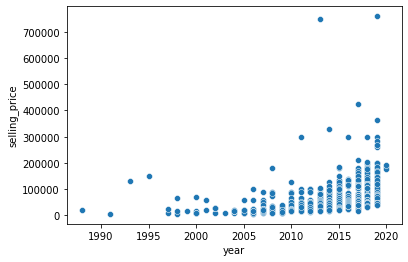

In [11]:
sns.scatterplot(df['year'],df['selling_price'])

In [12]:
df['name'].nunique()

279

In [13]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [14]:
pd.get_dummies(df,columns=['owner','seller_type'],drop_first=True)

,name,selling_price,year,km_driven,ex_showroom_price,owner_2nd owner,owner_3rd owner,owner_4th owner,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,350,NaN,0,0,0,1
1,Honda Dio,45000,2017,5650,NaN,0,0,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,12000,148114.0,0,0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,23000,89643.0,0,0,0,1
4,Yamaha SZ [2013-2014],20000,2011,21000,NaN,1,0,0,1
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,500000,52000.0,0,0,0,1
1057,Honda CB twister,16000,2012,33000,51000.0,0,0,0,1
1058,Bajaj Discover 125,15000,2013,35000,57000.0,1,0,0,1
1059,Honda CB Shine,12000,2009,53000,58000.0,0,0,0,1


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [16]:
features=df[['name','year','seller_type','owner','ex_showroom_price','km_driven']]
labels=df[['selling_price']]

In [17]:
features.shape

(1055, 6)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.25,random_state=42)

In [53]:
from sklearn.impute import SimpleImputer
si_exshow=SimpleImputer()
X_train_ex=si_exshow.fit_transform(X_train[['ex_showroom_price']])
X_test_ex=si_exshow.transform(X_test[['ex_showroom_price']])

In [57]:
X_train['ex_showroom_price']=X_train_ex
X_test['ex_showroom_price']=X_test_ex

C:\Users\krish\AppData\Local\Temp/ipykernel_5660/1096343391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['ex_showroom_price']=X_train_ex
C:\Users\krish\AppData\Local\Temp/ipykernel_5660/1096343391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['ex_showroom_price']=X_test_ex


In [58]:
X_train

,name,year,seller_type,owner,ex_showroom_price,km_driven
875,Hero Karizma ZMR,2015,Individual,1st owner,108000.000000,11000
137,KTM 390 Duke ABS [2013-2016],2015,Individual,1st owner,202127.000000,50000
324,Yamaha Fascino 110,2019,Individual,1st owner,57112.000000,1600
823,Bajaj Discover 100,2014,Individual,1st owner,42859.000000,14289
757,TVS Sport,2018,Individual,1st owner,87963.965957,25000
...,...,...,...,...,...,...
331,Bajaj Pulsar 135 LS,2010,Individual,1st owner,64589.000000,77000
467,Bajaj Avenger [2015],2012,Individual,1st owner,75502.000000,15000
121,UM Renegade Commando,2018,Individual,1st owner,180525.000000,7000
1050,Bajaj Pulsar 150,2010,Individual,1st owner,75000.000000,60000


In [59]:
ohe=OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [60]:
X_train_new=ohe.fit_transform(X_train[['owner','seller_type']])

In [61]:
X_test_new=ohe.transform(X_test[['owner','seller_type']])

In [62]:
training=np.hstack((X_train[['year','ex_showroom_price','km_driven']].values,X_train_new))

In [63]:
X_train_new

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

In [73]:
training

array([[2.01500e+03, 1.08000e+05, 1.10000e+04, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01500e+03, 2.02127e+05, 5.00000e+04, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01900e+03, 5.71120e+04, 1.60000e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       ...,
       [2.01800e+03, 1.80525e+05, 7.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01000e+03, 7.50000e+04, 6.00000e+04, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [2.01400e+03, 2.08902e+05, 1.20770e+04, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [65]:
testing=np.hstack((X_test[['year','ex_showroom_price','km_driven']].values,X_test_new))

In [75]:
testing

array([[2.0190000e+03, 8.7963966e+04, 1.2000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.0160000e+03, 8.1508000e+04, 4.5420000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.0170000e+03, 8.7963966e+04, 9.9990000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [2.0140000e+03, 1.9927500e+05, 1.9000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.0160000e+03, 8.0435000e+04, 2.9689000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [2.0070000e+03, 8.7963966e+04, 6.0000000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [67]:
y_train

,selling_price
875,75000
137,130000
324,69000
823,22000
757,34000
...,...
331,23000
467,35000
121,160000
1050,20000


In [77]:
X_train

,name,year,seller_type,owner,ex_showroom_price,km_driven
875,Hero Karizma ZMR,2015,Individual,1st owner,108000.000000,11000
137,KTM 390 Duke ABS [2013-2016],2015,Individual,1st owner,202127.000000,50000
324,Yamaha Fascino 110,2019,Individual,1st owner,57112.000000,1600
823,Bajaj Discover 100,2014,Individual,1st owner,42859.000000,14289
757,TVS Sport,2018,Individual,1st owner,87963.965957,25000
...,...,...,...,...,...,...
331,Bajaj Pulsar 135 LS,2010,Individual,1st owner,64589.000000,77000
467,Bajaj Avenger [2015],2012,Individual,1st owner,75502.000000,15000
121,UM Renegade Commando,2018,Individual,1st owner,180525.000000,7000
1050,Bajaj Pulsar 150,2010,Individual,1st owner,75000.000000,60000


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr=LogisticRegression()

In [70]:
lr.fit(training,y_train)

c:\users\krish\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\krish\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
lr.predict(testing)

array([145000,  25000,  60000,  60000,  60000,  25000,  25000, 300000,
        60000,  25000, 145000,  25000,  25000,  60000,  45000,  60000,
        60000,  25000,  35000,  60000,  25000,  25000,  25000,  25000,
        60000,  60000,  25000,  60000,  25000,  25000,  60000,  35000,
        35000, 750000,  25000,  25000,  45000,  45000,  25000,  25000,
        25000,  60000,  60000,  25000,  25000,  60000,  60000,  60000,
        35000, 300000,  25000,  60000,  25000,  35000,  25000,  25000,
       135000,  25000,  60000,  25000,  25000,  60000,  35000,  60000,
        35000,  25000,  25000,  25000, 105000,  25000,  25000,  25000,
        60000,  25000,  25000,  35000,  35000, 105000,  25000,  25000,
        25000,  60000,  25000,  45000,  60000,  25000,  45000,  60000,
        60000,  60000,  60000,  60000,  25000,  25000,  25000,  25000,
        60000,  60000,  25000,  25000,  25000,  60000,  25000,  60000,
        60000,  60000, 300000,  25000,  45000,  25000,  35000,  60000,
      